In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

my_path = '/content/notebooks'
# Colab Notebooks 안에 my_env 폴더에 패키지 저장
os.symlink('/content/drive/My Drive/Colab Notebooks/my_env', my_path)
sys.path.insert(0, my_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
pd.set_option('display.max.colwidth', 130)

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
fm._rebuild() 
%matplotlib inline


import feedparser
from bs4 import BeautifulSoup as bs
import urllib
import urllib.request as req
import requests

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

from konlpy.tag import Kkma, Okt, Komoran
okt = Okt()
from konlpy.utils import pprint

from collections import Counter
from datetime import datetime

In [3]:
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

import matplotlib

import matplotlib.font_manager as fm 
fm._rebuild() 

# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

from plotnine import *
import plotnine

import warnings
warnings.filterwarnings("ignore")

In [4]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import string

from gensim.models import Word2Vec

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## 일일누적기사량 그래프 확인 후 갑자기 수치가 올라가는 날짜의 클러스터링 수행
    - 일일누적기사량 계산 시에는 related News까지 모두 계산했지만
    - 클러스터링을 수행할 때는 네이버에서 이미 한 번 연관기사를 묶어놨기 때문에
    - 대표기사만 크롤링해서 수행

In [93]:
href_list = []
TitDesc_list = []
title_list = []

In [94]:
def Crawling(keyword, date):
    keyword = '+'.join(keyword.split(' '))

    last = False
    page_num = 1

    ds = date
    de = ds
    while last == False:
        url = "https://search.naver.com/search.naver?&where=news&query={0}&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=3&ds={1}&de={2}&docid=&nso=so:r,p:,a:all&mynews=1&cluster_rank=238&start={3}&refresh_start=0".format(keyword,ds,de,str(page_num))
        raw = requests.get(url)
        html = raw.content
        soup = bs(html, 'html.parser')

        ul = soup.find('ul', {'class':'type01'})
        li_list = ul.findAll('li')

        for li in li_list:
            try:
                href_list.append(li.dl.dt.a['href'])
                d_list = li.findAll('dd')     #자식 노드 dd가 두 개인데 두 번째 노드에 description이 들어가있으므로 전부 불러온 후 인덱싱할 것임
                title = li.dl.dt.a['title']
                description = d_list[1].text    # 자식 노드 dd의 두 번째에 들어가 있는 description을 text로 불러옴
                title_list.append(title)
                TitDesc_list.append( title + ' ' + description)
            except AttributeError:
                pass

        
        # 마지막 페이지 주소 확인 (다음페이지 버튼이 없으면 종료페이지로 간주)
        page = soup.find('div', {'class':'paging'})
        page_a_list = page.findAll('a')
        if '다음페이지' in str(page_a_list[-1]):
            page_num += 10
        else:
            last = True

In [95]:
Crawling('춘천', '2020.06.18')

In [96]:
title_list

['춘천지역 방사능 문제해결 시민대책위 발족',
 '춘천 대학생 전입 장려금 온라인 신청 폐지',
 '춘천 기업 달려가 "데이터댐" 외친 文···\'한국판 뉴딜\' 첫 행보',
 "한국전쟁 첫 승전고 '춘천대첩'",
 '강원도 "춘천 부시장 자체승진 인사, 부동의 불변"',
 '생활개선춘천시聯, 농산물 꾸러미사업에 손 보태',
 "'녹조라떼' 된 춘천 만천천",
 '文, 춘천 더존비즈온 방문 "디지털뉴딜, 데이터댐 만들기"',
 "문대통령, 데이터·AI 기업 찾아 춘천行…'한국판 뉴딜' 첫 행보",
 '춘천시, 1기분 자동차세 89억원 걷는다',
 '춘천시, 2030년까지 사유림 1,135만㎡ 매입',
 "문재인 대통령, 춘천 IT기업 방문 '한국판 뉴딜' 점검",
 '춘천시, 1기분 자동차세 89억원 걷는다',
 '춘천시, 부동산중개업소 일제 점검…투명한 거래 유도',
 '춘천시, 노인맞춤돌봄서비스 제공…이달 말까지 접수',
 '춘천마임축제···일상 축제로 관객과 만난다',
 '생활개선춘천시聯, 농산물 꾸러미사업에 손 보태',
 "'춘천 생명살림 운동' 케나프 파종",
 '[춘천]춘천시향 정기연주회 취소',
 '춘천 노인복지관, 평생교육프로그램 이용료 환불',
 '[의정소식]춘천시의회 2020년 6월 18일',
 '[춘천]호수나라물빛축제 8월부터 격주로 개최',
 '"디지털로 경제 선도할 것" 文 대통령, 한국판 뉴딜 첫 현장행보로 \'춘천행\'',
 '한국사진작가협회 춘천지부 제53회 회원전 내일 개막',
 '경찰 공갈ㆍ협박 혐의 춘천지역 노동단체 지회장 내사',
 '춘천 캠프페이지 오염 민간검증단 구성 빨라진다',
 '[포토뉴스]김대호 춘천상의 회장 코로나 극복희망릴레이',
 '국립춘천박물관·강원연구원 공동',
 '[새의자] 김종곤 춘천시청년청 초대 운영위원장',
 '[춘천]불법 어업 집중 단속',
 '[춘천]노후경유차 폐차 추가 신청',
 '강원 춘천 남산면 산수리 513 캠핑장에서 진돗개 발견 보호',
 '[춘천][의회 중계석] "청년층 타지역 유출 

In [97]:
TitDesc_okt = []

for item in TitDesc_list:
  item_nouns = ' '.join(okt.nouns(item))
  TitDesc_okt.append(item_nouns)

  tfidf_vectorizer = TfidfVectorizer()
  tfidf_matrix_okt = tfidf_vectorizer.fit_transform(TitDesc_okt)
TitDesc_okt[:3]
#Vectorization

['춘천 지역 방사 능 문제해결 시민 대책위 발족 강원 춘천 지역 방사 능 문제 해결 위 시민 대책 위원회 발족 춘천 방사 능 생활 감시 단 오후 시청 브리핑 룸 기자회견 지역 방사 능 문제 춘천 시민 연대 등 계해 시민 명',
 '춘천 대학생 전입 장려 금 온라인 신청 폐지 춘천 지역 대학생 전입 장려 금 허위 신청 사례 춘천시 온라인 신청 춘천시 다른 지역 거주 전입 장려 금 허위 신청 거나 제출 서류 첨부 문제점',
 '춘천 기업 데이터 댐 한국판 뉴딜 첫 행보 문 대통령 강원도 춘천 데이터 인공 지능 전문 기업 더존 비즈 온 강촌 캠퍼스 한국판 뉴딜 통해 포스트 코로나 시대 선도 의지 앞서 문 대통령 신종 코로나바이러스 감염증']

In [98]:
doc_df = pd.DataFrame(data=TitDesc_okt)
doc_df.columns = ["title + article"]
doc_df['title'] = 0
doc_df['num']=0
for i in range(len(doc_df)):
  doc_df.iloc[i, 2] = i
  doc_df.iloc[i, 1] = title_list[i]
doc_df.head()

topic_df = doc_df

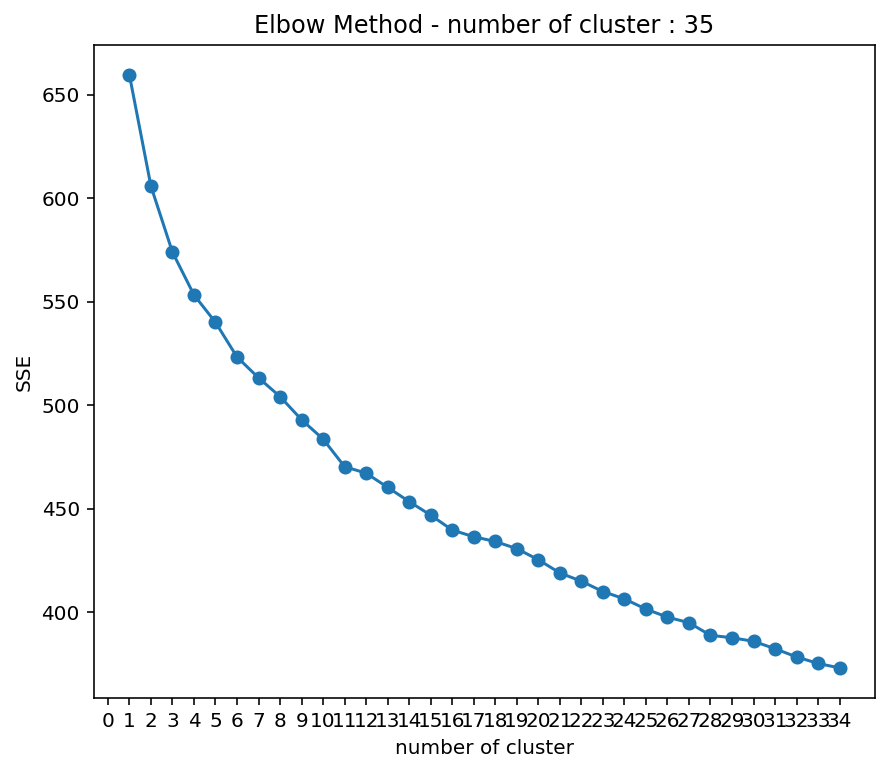

In [99]:
x = normalize(tfidf_matrix_okt)
# L2 정규화

def elbow(normalizedData, Clusters):
    sse = []
    for i in range(1,Clusters):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
        kmeans.fit(normalizedData)
        sse.append(kmeans.inertia_)
    plt.figure(figsize=(7,6))
    plt.plot(range(1,Clusters), sse, marker='o')
    plt.xlabel('number of cluster')
    plt.xticks(np.arange(0,Clusters,1))
    plt.ylabel('SSE')
    plt.title('Elbow Method - number of cluster : '+str(Clusters))
    plt.show()
elbow(x, 35)

In [100]:
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize)
feature_vect = tfidf_vect.fit_transform(topic_df['title + article'])

In [118]:

clusters_num = 15

km_cluster = KMeans(n_clusters=clusters_num, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [119]:
topic_df['cluster_label'] = cluster_label
topic_df.head()

for i in range(clusters_num):
  print('<<Clustering Label {0}>>'.format(i)+'\n')
  print(topic_df.loc[topic_df['cluster_label']==i])

<<Clustering Label 0>>

                                                                                                                       title + article  ... cluster_label
0          춘천 지역 방사 능 문제해결 시민 대책위 발족 강원 춘천 지역 방사 능 문제 해결 위 시민 대책 위원회 발족 춘천 방사 능 생활 감시 단 오후 시청 브리핑 룸 기자회견 지역 방사 능 문제 춘천 시민 연대 등 계해 시민 명  ...             0
1                            춘천 대학생 전입 장려 금 온라인 신청 폐지 춘천 지역 대학생 전입 장려 금 허위 신청 사례 춘천시 온라인 신청 춘천시 다른 지역 거주 전입 장려 금 허위 신청 거나 제출 서류 첨부 문제점  ...             0
3                                     한국 전쟁 첫 승전 춘천 대첩 오늘 한국 전쟁 당시 가장 먼저 국군 승전 고가 춘천 춘천 대첩 낙동강 전투 인천 상륙작전 한국 전쟁 대첩 정도 의미 우리 역사 기억 속 남아  ...             0
4                  강원도 춘천 부시장 자체 승진 인사 부동 불변 강원도 춘천시 검토 중인 부시장 자체 승진 인사 다시 한번 동의 의사 방침 강원도 집행 부 관계자 춘천시 자체 승진 통해 개월 임기 부시장 임명 것 도 군 협력  ...             0
5                    생활 개선 춘천시 농산물 꾸러미 사업 손 보태 한국 생활 개선 춘천시 연합 회 회장 변옥철 코로나 장기 화로 학교 식이 중단 것 관련 농산물 꾸러미 사업 인력 지원 지난 저녁 춘천 지역 먹거리 통합 센터  ...             0
..                                                  

In [107]:
clustersNum = topic_df['cluster_label'].groupby(topic_df['cluster_label']).count()
df= pd.DataFrame(clustersNum)

In [108]:
df.columns = ['count']
len(df['count'])

23

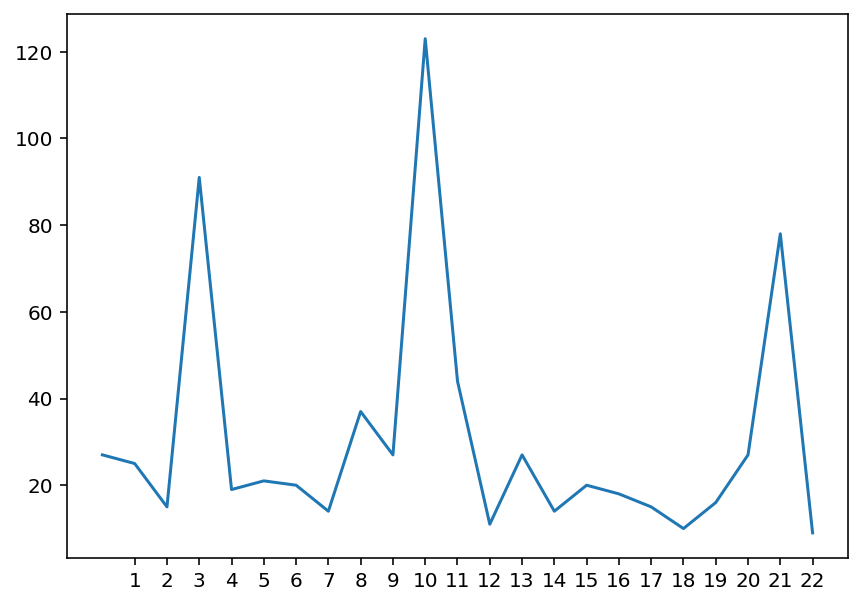

In [109]:
plt.figure(figsize=(7,5))
plt.plot(df.index, df['count'])
plt.xticks(np.arange(1, clusters_num))
plt.show()

In [63]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape : ', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape :  (20, 2151)
[[0.         0.         0.         ... 0.         0.05910837 0.        ]
 [0.         0.08971933 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [110]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 제목들을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 제목 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['title']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['title'] = filenames
        
    return cluster_details

In [111]:
def print_cluster_details(cluster_details):    
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Title :',cluster_detail['title'][:7])
        print('==================================================')

In [112]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=topic_df,\
                                  feature_names=feature_names, clusters_num=clusters_num, top_n_features=10 )
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['대통령', '선도', '뉴딜', '문', '포스트', '코로나', '시대', '의지', '한국판', '지능']
Title : ['춘천 기업 달려가 "데이터댐" 외친 文···\'한국판 뉴딜\' 첫 행보', "문대통령, 데이터·AI 기업 찾아 춘천行…'한국판 뉴딜' 첫 행보", "문재인 대통령, 춘천 IT기업 방문 '한국판 뉴딜' 점검", '[레이더P] 文 "디지털 뉴딜은 데이터댐…포스트코로나 선도형 경제 기반"', "문 대통령 '한국판 뉴딜' 본격 시동", "문 대통령 '한국판 뉴딜' 본격 시동", '문대통령 "디지털뉴딜, 선도형 경제 기반될 것"']
####### Cluster 1
Top features: ['더존', '비즈', '온', '방문', '대통령', '문재인', '그룹', '김용우', '뉴딜', '기업']
Title : ['文대통령 디지털뉴딜 첫 방문지, 더존비즈온은 어떤 회사?', '文대통령 디지털뉴딜 첫 방문지, 더존비즈온은 어떤 회사?', '文대통령 디지털뉴딜 첫 방문지, 더존비즈온은 어떤 회사?', "文 '데이터·AI 경제 활성화' 첫 행보로 강원 소재 기업 방문", "文 '데이터·AI 경제 활성화' 첫 행보로 강원 소재 기업 방문", "문재인 대통령, 한국판 뉴딜 핵심 '더존비즈온' 현장 방문", "문재인 대통령, 한국판 뉴딜 핵심 '더존비즈온' 현장 방문"]
####### Cluster 2
Top features: ['시간', '일출', '서해안', '대체로', '오늘', '날씨', '경기', '바다', '체급', '배달']
Title : ['‘선두그룹 주춤한 틈에…’ 배달 앱 후발주자들의 이유 있는 질주', '‘선두그룹 주춤한 틈에…’ 배달 앱 후발주자들의 이유 있는 질주', '[날씨] 남부지방 18일 많은 비……중부는 더워', '[날씨] 남부지방 18일 많은 비……중부는 더워', '[날씨] 남부지방 18일 많은 비……중부는 더워', "아름드리 밤나무 글벗과 스무 해 '동행'"

In [113]:
# 토큰화 된 문장 리스트를 단어별로 split한 후 2차원 리스트로 저장
WordVoca_list = []
for item in TitDesc_okt:
    WordVoca_list.append(item.split(' '))

# split된 2차원 리스트 중에서 한 글자짜리 단어들을 모두 제외시키고 WordVoca 리스트 생성
# Word2Vec 모델 학습 데이터로 활용됨
WordVoca = []
for i in range(len(WordVoca_list)):
    element = []
    for j in range(len(WordVoca_list[i])):
        if len(WordVoca_list[i][j]) > 1:
            element.append(WordVoca_list[i][j])
    WordVoca.append(element)

In [114]:
def WordSimilarity(word, count):
    model = Word2Vec(sentences=WordVoca, size=100, window=5, min_count=5, workers=4, sg=1)
    model_result = model.most_similar(positive=[word], topn=count)

    Similarity_df = pd.DataFrame(model_result, columns=[word,'Similarity'])
    print('{0}과 유사한 단어 Top {1} :'.format(word, count))
    print(Similarity_df)

In [115]:
WordSimilarity('더존', 10)

더존과 유사한 단어 Top 10 :
     더존  Similarity
0    비즈    0.998382
1   개발자    0.996163
2   문재인    0.995936
3   데이터    0.995885
4    위치    0.995664
5    방문    0.994745
6  과학기술    0.994387
7   대통령    0.993317
8    설명    0.993005
9    소재    0.992163
